In [1]:
#Name: B.Durga Jasvittha
#Reg No: BL.EN.U4AIE21029


In [88]:
import librosa
import librosa.display
import IPython.display as ipd
from IPython.display import Audio
from itertools import cycle
y, sr= librosa.load(r"C:\Users\jasvi\Downloads\speechsignal.wav")

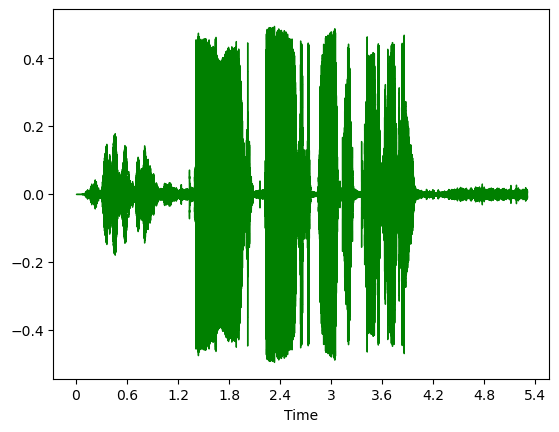

In [13]:
librosa.display.waveshow(y,color="g")

In [14]:
Audio(data=y,rate=sr)

In [59]:
#Q1.  Use librosa.effects.trim() to remove the silence parts of speech from beginning and 
#end of your recorded signal. Listen to the new signal and perceptually compare the audio with 
#original


yt, index= librosa.effects.trim(y,top_db=10) # 10 decibels down of the peak is trimmed
yt1, index1= librosa.effects.trim(y,top_db=20)
yt2, index2= librosa.effects.trim(y,top_db=30)
yt3, index3= librosa.effects.trim(y,top_db=40)
yt4, index4= librosa.effects.trim(y,top_db=50)
yt5, index5= librosa.effects.trim(y,top_db=60)

In [51]:
Audio(data=yt, rate =sr)

In [73]:
print("Duration of original signal:",librosa.get_duration(y=y))
print("Duration of trimmed signal (top_db=10):",librosa.get_duration(y=yt))
print("Duration of trimmed signal (top_db=20):",librosa.get_duration(y=yt1))
print("Duration of trimmed signal (top_db=30):",librosa.get_duration(y=yt2))
print("Duration of trimmed signal (top_db=40):",librosa.get_duration(y=yt3))
print("Duration of trimmed signal (top_db=50):",librosa.get_duration(y=yt4))
print("Duration of trimmed signal (top_db=60):",librosa.get_duration(y=yt5))

Duration of original signal: 5.304036281179139
Duration of trimmed signal (top_db=10): 2.5541950113378684
Duration of trimmed signal (top_db=20): 3.6919727891156464
Duration of trimmed signal (top_db=30): 3.8545124716553287
Duration of trimmed signal (top_db=40): 5.164716553287982
Duration of trimmed signal (top_db=50): 5.23437641723356
Duration of trimmed signal (top_db=60): 5.23437641723356


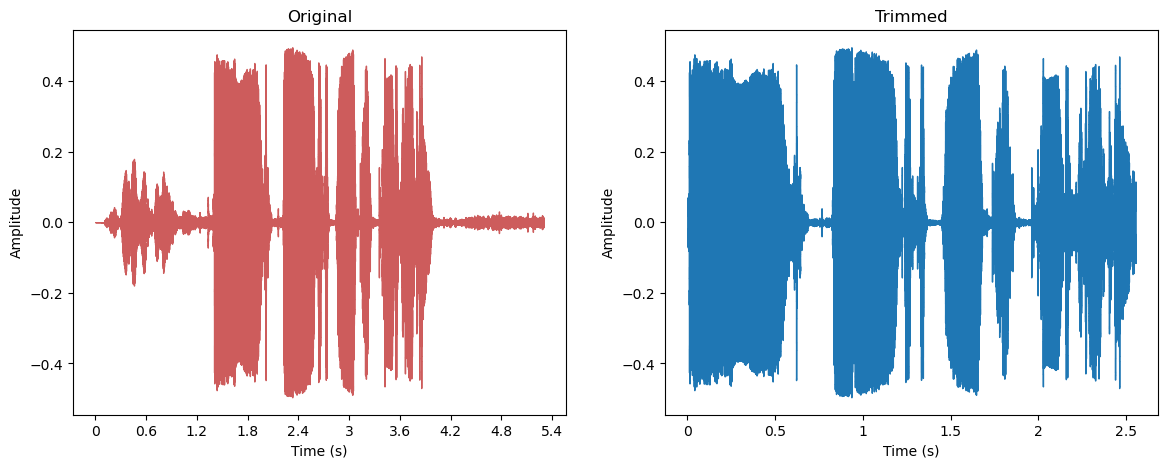

In [37]:
import matplotlib.pyplot as plt
plt.figure(figsize=(14, 5))
plt.subplot(1,2,1)
librosa.display.waveshow(y, sr=sr, color= "#CD5C5C")
plt.title('Original')
plt.xlabel('Time (s)')
plt.ylabel('Amplitude')

plt.subplot(1, 2, 2)
librosa.display.waveshow(yt, sr=sr)
plt.title("Trimmed")
plt.xlabel('Time (s)')
plt.ylabel('Amplitude')


plt.show()

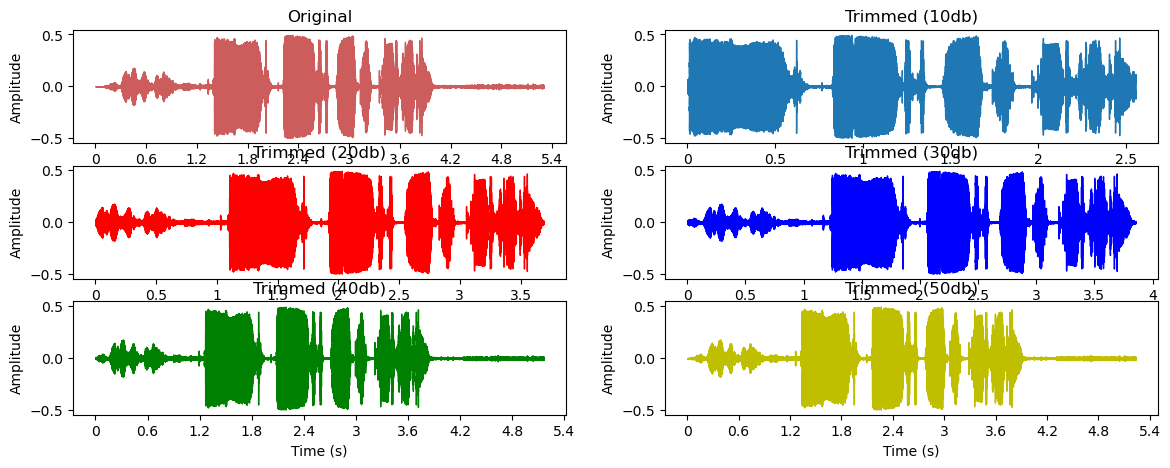

In [61]:
import matplotlib.pyplot as plt
plt.figure(figsize=(14, 5))
plt.subplot(3,2,1)
librosa.display.waveshow(y, sr=sr, color= "#CD5C5C")
plt.title('Original')
plt.xlabel('Time (s)')
plt.ylabel('Amplitude')

plt.subplot(3, 2, 2)
librosa.display.waveshow(yt, sr=sr)
plt.title("Trimmed (10db)")
plt.xlabel('Time (s)')
plt.ylabel('Amplitude')

plt.subplot(3,2,3)
librosa.display.waveshow(yt1, sr=sr, color= "r")
plt.title('Trimmed (20db)')
plt.xlabel('Time (s)')
plt.ylabel('Amplitude')

plt.subplot(3, 2, 4)
librosa.display.waveshow(yt2, sr=sr, color= "b")
plt.title("Trimmed (30db)")
plt.xlabel('Time (s)')
plt.ylabel('Amplitude')

plt.subplot(3, 2, 5)
librosa.display.waveshow(yt3, sr=sr, color= "g")
plt.title("Trimmed (40db)")
plt.xlabel('Time (s)')
plt.ylabel('Amplitude')

plt.subplot(3, 2, 6)
librosa.display.waveshow(yt4, sr=sr, color= "y")
plt.title("Trimmed (50db)")
plt.xlabel('Time (s)')
plt.ylabel('Amplitude')




plt.show()

In [83]:
peak_amplitude #to find the peak amplitude

0.495553

In [113]:
# A2. Use librosa.effects.split() to split the recorded speech with detected silences. Play 
#around with the top_db parameter and see the effects of split. Listen to the generated signals and 
#observe the split quality.
nonmutesections= librosa.effects.split(y, top_db=20)

In [90]:
nonmutesections

array([[  1536, 116954]])

In [91]:
y_split=y[1536: 116954]

In [92]:
Audio(data=y_split, rate=sr)

In [93]:
y1, sra= librosa.load(r"C:\Users\jasvi\OneDrive\Desktop\sem6\sp\lab2.wav")

In [137]:
nonmutesections1= librosa.effects.split(y1, top_db=30)

In [138]:
nonmutesections1 # Shows the sections where the audio signal is more that top_db-30db

array([[  2560,  29184],
       [ 37888, 101376],
       [102400, 108032],
       [115712, 131072],
       [132608, 152576],
       [153088, 166912],
       [168960, 172544],
       [174592, 182272]])

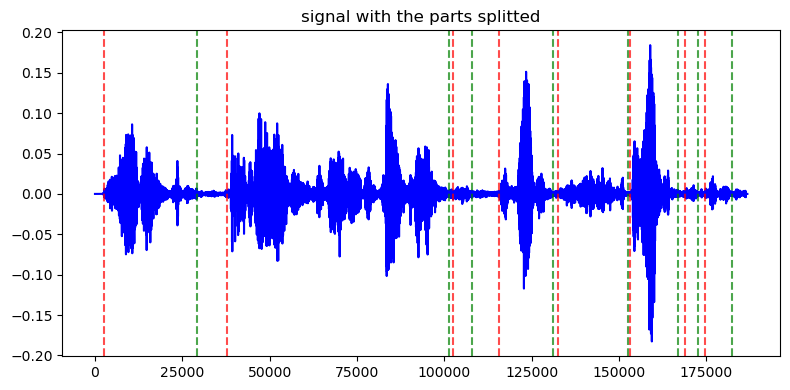

In [139]:
import matplotlib.pyplot as plt
plt.figure(figsize=(8,4))
plt.plot(y1, color='b')


for i in nonmutesections1:
    plt.axvline(i[0], color="r", linestyle='--', alpha=0.7)
    plt.axvline(i[1], color="g", linestyle='--', alpha=0.7)
plt.title("signal with the parts splitted")
plt.tight_layout()
plt.show()

#Audio signal between red and green lines, silence between green and red lines 

In [141]:
Audio(data=y1[ 37888: 101376], rate=sr)
# We can observe that as the top_db increases silence is more effectively splitted

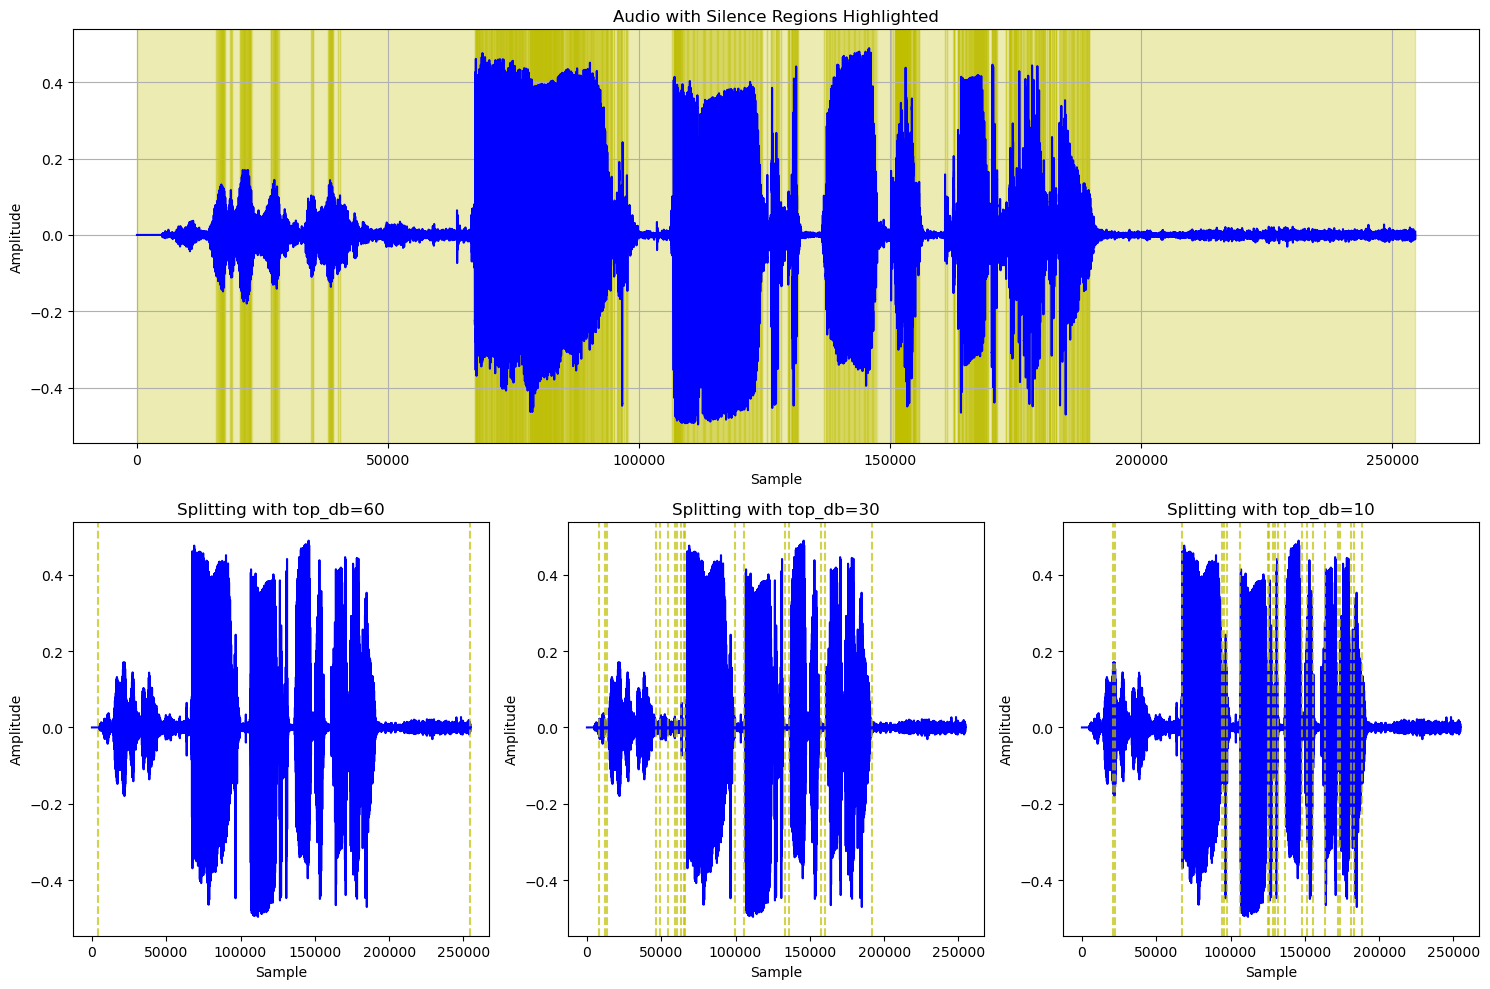

In [152]:
#Q3
def calculate_energy(signal):
    squared_signal = np.square(signal)  # Calculate the squared signal
    energy = np.sum(squared_signal)  # Calculate the total energy by summing the squared samples
    return energy

# Function to detect silence based on energy threshold
def detect_silence(signal, threshold):
    energy = calculate_energy(signal)
    if energy < threshold:  # If the energy is below the threshold, consider it as silence
        return True
    else:
        return False

# Load the audio file
file_path = r"C:\Users\jasvi\Downloads\speechsignal.wav"
audio_signal, sample_rate = librosa.load(file_path, sr=None)

# Define an energy threshold for silence detection
energy_threshold = 0.01  

# Detect silence regions in the audio
silence_regions = []
current_region = []
for i, sample in enumerate(audio_signal):
    if detect_silence(sample, energy_threshold):
        current_region.append(i)
    elif current_region:
        silence_regions.append(current_region)
        current_region = []
if current_region:
    silence_regions.append(current_region)

# Perform splitting with different top_db values
top_db_values = [60,30,10]  

# Plot of the  waveform with silence regions and split intervals 
plt.figure(figsize=(15, 10))

# Plot of the waveform with silence regions highlighted
plt.subplot(2, 1, 1)
plt.plot(audio_signal, color='b')
for region in silence_regions:
    plt.axvspan(region[0], region[-1], color='y', alpha=0.3)
plt.title("Audio with Silence Regions Highlighted")
plt.xlabel("Sample")
plt.ylabel("Amplitude")
plt.grid(True)

# Plot the waveform with split intervals overlaid
for i, top_db in enumerate(top_db_values):
    plt.subplot(2, len(top_db_values), len(top_db_values) + i + 1)
    split_audio_intervals = librosa.effects.split(audio_signal, top_db=top_db)
    plt.plot(audio_signal, color='b')
    for interval in split_audio_intervals:
        plt.axvline(interval[0], color='y', linestyle='--', alpha=0.7)
        plt.axvline(interval[1], color='y', linestyle='--', alpha=0.7)
    plt.title(f"Splitting with top_db={top_db}")
    plt.xlabel("Sample")
    plt.ylabel("Amplitude")
    plt.tight_layout()

plt.show()

In [149]:
energy

0.014338000193318526